In [176]:
#1. sklearn을 이용하지 않고(자신의 코드로)

In [177]:
from sklearn import datasets

In [178]:
diabetes=datasets.load_diabetes()

In [179]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [180]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [181]:
import numpy as np
import matplotlib.pyplot as plt

In [182]:
X = diabetes['data']
Y = diabetes['target']
x1 = X[:,3]
x2 = Y

In [183]:
c1 = [0,50]; c2 = [0,150]; c3 = [0, 250]
cen = [[0,0,0],[50,150,250]]

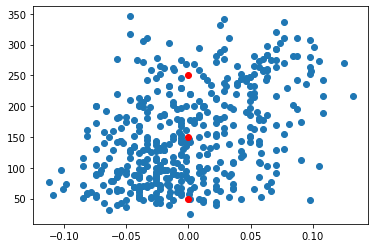

In [184]:
plt.scatter(x1,x2)
plt.plot(cen[0],cen[1], 'ro')

In [191]:
r1 = (x1-c1[0])**2+(x2-c1[1])**2
r2 = (x1-c2[0])**2+(x2-c2[1])**2
r3 = (x1-c3[0])**2+(x2-c3[1])**2

In [192]:
g = np.array([])
for i in range(len(r1)):
    g= np.append(g, np.argmin([r1[i],r2[i],r3[i]]))

In [187]:
n,a1,a2 = 0,0,0
for i in range(len(r1)):
    if (g[i]==0) :
        n=n+1
        a1 = a1 + x1[i]
        a2 = a2+x2[i]
a1/n,a2/n 

(-0.022380940159553154, 70.8445945945946)

In [193]:
a=[]
for j in range(3) :
    a.append([np.mean([x1[i]for i in np.where(g==j)]), np.mean([x2[i] for i in np.where(g==j)])])

In [194]:
c1 = [a[0][0], a[0][1]]
c2 = [a[1][0], a[1][1]]
c3 = [a[2][0], a[2][1]]

In [195]:
c1 , c2 , c3

([-0.019765077206992002, 74.69461077844312],
 [-0.003122741886548426, 155.9748427672956],
 [0.03273520563387001, 258.3534482758621])

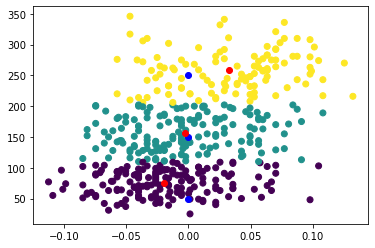

In [196]:
plt.scatter(x1,x2,c=g)
plt.plot(cen[0],cen[1], 'bo')
plt.plot([i[0] for i in a], [i[1] for i in a], 'ro')

In [197]:
#sklearn 사용

In [198]:
from sklearn.cluster import KMeans

In [199]:
km = KMeans(n_clusters = 3)
X=[x1,x2]
data = np.transpose(X)

In [200]:
km.fit(data)

KMeans(n_clusters=3)

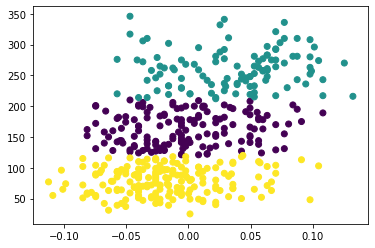

In [201]:
plt.scatter(x1,x2,c=km.labels_)

In [202]:
#cluster 수 결정하는 방법 : ELBOW METHOD
 '''cluster 개수 1 to 10으로 반복학습 진행.
 각기 다른 cluster model마다 inertia 확인하여 감소폭이 크게 감소하는 부분이 
 가장 적절한 cluster 수 이다.''' 

IndentationError: unexpected indent (<ipython-input-202-2ee68bb22cc9>, line 2)

In [203]:
num_clusters = range(1,11)
inertias = []

In [204]:
for i in num_clusters:
    km = KMeans(n_clusters=i)
    km.fit(data)
    inertias.append(km.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


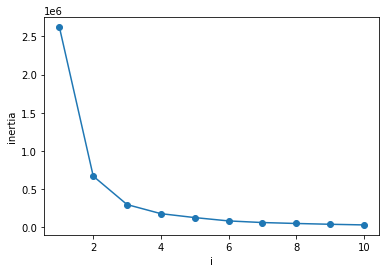

In [205]:
plt.xlabel('i')
plt.ylabel('inertia')
plt.plot(num_clusters, inertias, '-o')

In [206]:
km = KMeans(n_clusters = 3)

X=[x1,x2]
data = np.transpose(X)

In [207]:
km.fit(data)

KMeans(n_clusters=3)

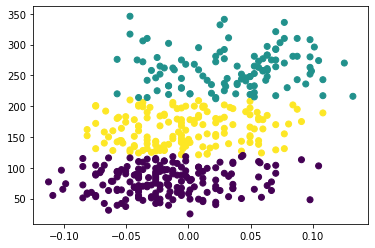

In [208]:
plt.scatter(x1,x2,c=km.labels_)